In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_absolute_error as mae

In [2]:
data = sio.loadmat('results/latest/LSTM_one_week.mat')

In [3]:
data_ref = sio.loadmat('groundtruth_data_weekly_avg.mat')

for key in data_ref.keys():
    if key.startswith('__'):
        continue
    data_ref[key] = data_ref[key].reshape(-1)

In [4]:
data_pinn = sio.loadmat('pinn_res_all.mat')

for key in data_pinn.keys():
    if key.startswith('__'):
        continue
    data_pinn[key] = data_pinn[key].reshape(-1)

Text(0.5, 0.98, 'predictions for the following one week')

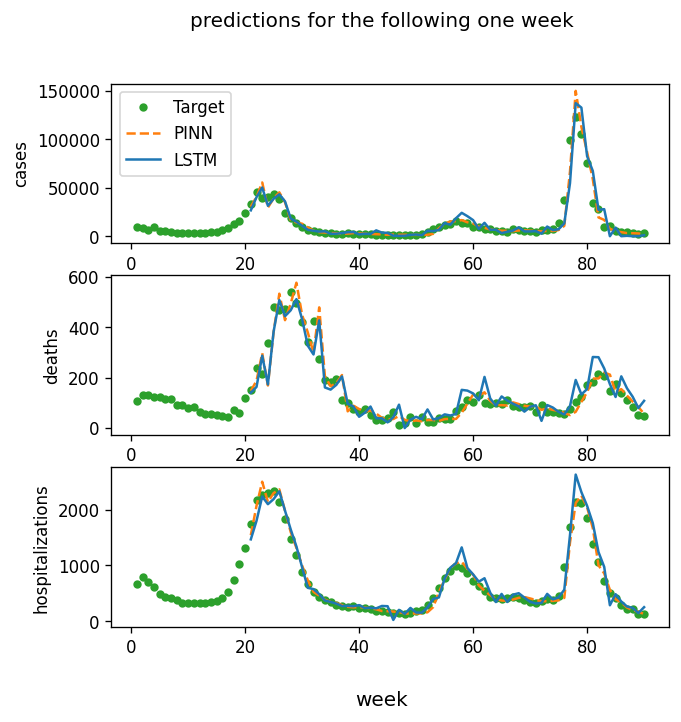

In [5]:
fig = plt.figure(figsize=(6, 6), dpi=120)
plt.subplot(3, 1, 1)
plt.plot(np.arange(1, 91), data_ref['cases'].reshape(-1)[20:110], 'o', color='tab:green', markersize=4, label='Target')
plt.plot(np.arange(21, 91), data_pinn['cases_pred_1w'].reshape(-1), '--', color='tab:orange', label="PINN")
plt.plot(np.arange(21, 91), data['pred'][3:, 0], '-', color='tab:blue', markersize=4, label='LSTM')
plt.ylabel('cases')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(np.arange(1, 91), data_ref['deaths'].reshape(-1)[20:110], 'o', color='tab:green', markersize=4, label='Target')
plt.plot(np.arange(21, 91), data_pinn['deaths_pred_1w'].reshape(-1), '--', color='tab:orange', label="PINN")
plt.plot(np.arange(21, 91), data['pred'][3:, 1], '-', color='tab:blue', markersize=4, label='LSTM')
plt.ylabel('deaths')

plt.subplot(3, 1, 3)
plt.plot(np.arange(1, 91), data_ref['hospitalized'].reshape(-1)[20:110], 'o', color='tab:green', markersize=4, label='Target')
plt.plot(np.arange(21, 91), data_pinn['hospitalized_pred_1w'].reshape(-1), '--', color='tab:orange', label="PINN")
plt.plot(np.arange(21, 91), data['pred'][3:, 2], '-', color='tab:blue', markersize=4, label='LSTM')
plt.ylabel('hospitalizations')

fig.supxlabel("week")
fig.suptitle("predictions for the following one week")

# Plot predictions for 1-4 weeks

In [6]:
result_path = 'results/latest/'

data_one_week = sio.loadmat(result_path + 'LSTM_one_week.mat')
data_two_week = sio.loadmat(result_path + 'LSTM_two_week.mat')
data_three_week = sio.loadmat(result_path + 'LSTM_three_week.mat')
data_four_week = sio.loadmat(result_path + 'LSTM_four_week.mat')

In [7]:
data = [data_one_week, data_two_week, data_three_week, data_four_week]

In [8]:
fig = plt.figure(figsize=(12, 8), dpi=120)
X, Y = 4, 3

for week in range(1, 5):
    plt.subplot(X, Y, Y * (week - 1) + 1)
    plt.plot(np.arange(1, 91), data_ref['cases'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'cases_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data[week-1]['pred'][4-week:, 0], '-', color='tab:blue', markersize=4, label='LSTM')
    if week == 1:
        plt.title('cases', fontsize=12)
        plt.legend()
    plt.ylabel("week " + str(week), fontsize=12)

    plt.subplot(X, Y, Y * (week - 1) + 2)
    plt.plot(np.arange(1, 91), data_ref['deaths'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'deaths_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data[week-1]['pred'][4-week:, 1], '-', color='tab:blue', markersize=4, label='LSTM')
    if week == 1:
        plt.title('deaths', fontsize=12)

    plt.subplot(X, Y, Y * (week - 1) + 3)
    plt.plot(np.arange(1, 91), data_ref['hospitalized'][20:110], 'o', color='tab:green', markersize=4, label='Target')
    plt.plot(np.arange(21, 91), data_pinn[r'hospitalized_pred_%dw' % (week)], '--', color='tab:orange', label="PINN")
    plt.plot(np.arange(21, 91), data[week-1]['pred'][4-week:, 2], '-', color='tab:blue', markersize=4, label='LSTM')
    if week == 1:
        plt.title('hospitalizations', fontsize=12)

fig.supxlabel("week", fontsize=13)
fig.supylabel("predictions for the following 1-4 weeks", fontsize=13)
fig.tight_layout()

# Calculate MASE

In [9]:
for week in range(1, 5):
    mae_cases = mae(data_ref['cases'][40:110], data[week-1]['pred'][4-week:, 0])
    mae_cases_naive = mae(data_ref['cases'][40:110], data_ref['cases'][40-week:110-week])
    print(r"mase_cases_%dw: %f" % (week, mae_cases / mae_cases_naive))
    
for week in range(1, 5):
    mae_deaths = mae(data_ref['deaths'][40:110], data[week-1]['pred'][4-week:, 1])
    mae_deaths_naive = mae(data_ref['deaths'][40:110], data_ref['deaths'][40-week:110-week])
    print(r"mase_deaths_%dw: %f" % (week, mae_deaths / mae_deaths_naive))
    
for week in range(1, 5):
    mae_hosp = mae(data_ref['hospitalized'][40:110], data[week-1]['pred'][4-week:, 2])
    mae_hosp_naive = mae(data_ref['hospitalized'][40:110], data_ref['hospitalized'][40-week:110-week])
    print(r"mase_hospitalized_%dw: %f" % (week, mae_hosp / mae_hosp_naive))

mase_cases_1w: 0.972217
mase_cases_2w: 1.022488
mase_cases_3w: 1.030963
mase_cases_4w: 1.022781
mase_deaths_1w: 1.240463
mase_deaths_2w: 1.311239
mase_deaths_3w: 1.199281
mase_deaths_4w: 1.167264
mase_hospitalized_1w: 0.852052
mase_hospitalized_2w: 0.923473
mase_hospitalized_3w: 1.047976
mase_hospitalized_4w: 1.077245
